In [1]:
###########  TITANIC DATASET    ###########

In [2]:
# ---This project workflow will be as follows 

In [3]:
#---1: eda
#---2:feature modeling and data cleaning
#---3:running through some basic ML algorithms

In [4]:
#this dataset can be found in www.kaggle.com
#this project was mainly done by gathering insights from kaggle

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
tit=pd.read_csv('titanic_train.csv')

In [8]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
#there are 12 columns in this dataset

In [11]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#basic thing is to see how many people have survived from this tragic

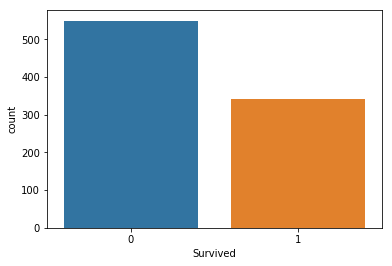

In [15]:
sns.countplot('Survived',data=tit)

In [18]:
tit['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
#this shows us that the count of survivors is less

In [20]:
#now lets analyse each feature from the dataset

In [22]:
#SEX-----------------------------------------------------------------------------------------
tit.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

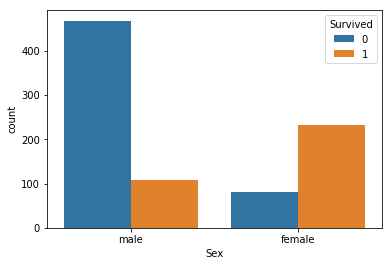

In [24]:
sns.countplot('Sex',hue='Survived',data=tit)

In [25]:
#The number of men on the ship is lot more than the number of women.
#Still the number of women saved is almost twice the number of males saved.

In [29]:
#PCLASS---------------------------------------------------------------------------------------
x=pd.crosstab(tit.Pclass,tit.Survived,margins=True)

In [30]:
x

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [31]:
#Here we can see that in Pclass-3 there are more number of people
#more number of people survied are from higher class(pclass-1), May be because of their wealth and money.

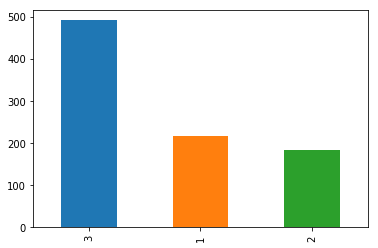

In [41]:
tit['Pclass'].value_counts().plot.bar()


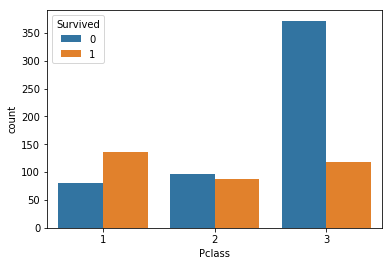

In [42]:
sns.countplot('Pclass',hue='Survived',data=tit)

In [43]:
#Even though there are less number of higher class people more than half of them had been saved.
#but lower class people have not been saved that much

In [44]:
pd.crosstab([tit.Sex,tit.Survived],tit.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

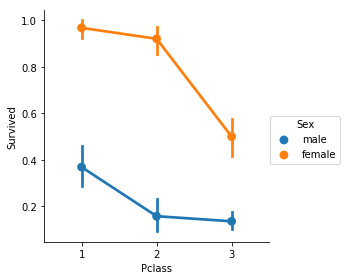

In [45]:
sns.factorplot('Pclass','Survived',hue='Sex',data=tit)

In [46]:
#from the cross tab we can confirm that survival of Women from pclass 1 95% as only 3 women seem to be dead .
#irrespective of the pclass we can say that women are more probably saved more than men.

In [47]:
#AGE------------------------------------------------------------------

In [53]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
#there is null values in some columns and age feature hass 177 null values.

In [56]:
#so we have to make those null values into proper number
#there are many ways to do
#to fill in the mean valu
#to drop those values, but there are too many of them so this is not possible
#----this is one kind of way which i found in one of kaggle notebooks
# what we can do is using "name" feature we can get initials of each induvidual and collect them as the age.
# eg; Mr, Mrs ,Miss and catagories them into particular age using mean values 

In [58]:
tit['Initial']=0
#to get them we need to use regexp --> (A-Za-z+)\.
for i in tit:
    tit['Initial']=tit.Name.str.extract('([A-Za-z]+)\.')
#this extracts us the required expression containing trhe initials

C:\Users\SAI KRISHNA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [68]:
tit.groupby(['Initial'])['Sex'].count()

Initial
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: Sex, dtype: int64

In [69]:
pd.crosstab(tit.Initial,tit.Sex)

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [70]:
#there are many forms of initials in here so we should catagorized them in certain particulars
#such as Master ,Miss,Mr,others(which contain other initals)

In [71]:
tit['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [72]:
pd.crosstab(tit.Initial,tit.Sex)

Sex,female,male
Initial,,
Master,0,40
Miss,186,0
Mr,1,528
Mrs,127,0
Other,0,9


In [73]:
#now we have brought down each many initials into 5 catagories

In [74]:
tit.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [75]:
#so this gives us the mean of each catagories and we can code a function which fills these values into the null values in 'Age'

In [85]:
tit.loc[(tit.Age.isnull())&(tit.Initial=='Mr'),'Age']=33
tit.loc[(tit.Age.isnull())&(tit.Initial=='Mrs'),'Age']=36
tit.loc[(tit.Age.isnull())&(tit.Initial=='Master'),'Age']=5
tit.loc[(tit.Age.isnull())&(tit.Initial=='Miss'),'Age']=22
tit.loc[(tit.Age.isnull())&(tit.Initial=='Other'),'Age']=46

In [87]:
tit.Age.isnull().sum()

0

In [88]:
#so we have replaced all the null values with the mean values got from the name feature

In [89]:
pd.crosstab(tit.Initial,tit.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


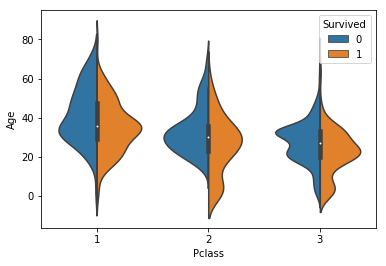

In [93]:
sns.violinplot('Pclass','Age',data=tit,hue='Survived',split=True)

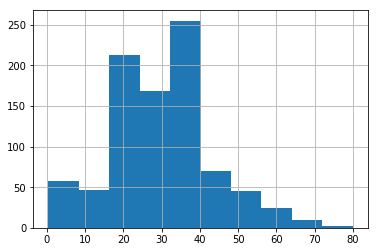

In [103]:
tit['Age'].hist()

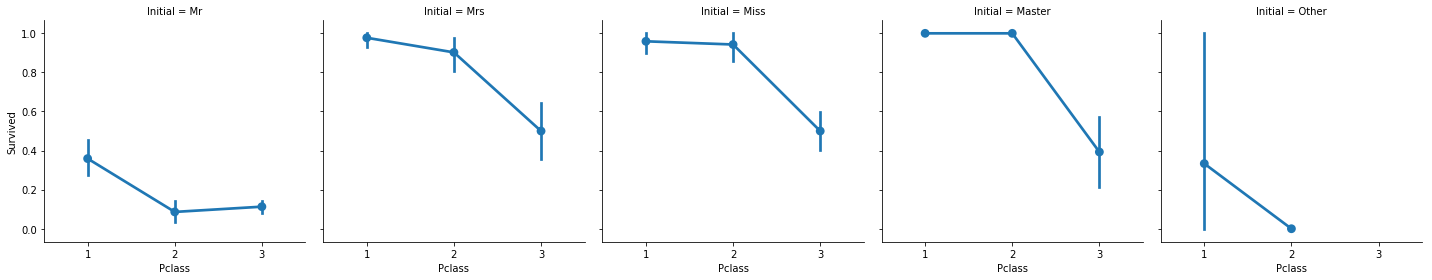

In [106]:
sns.factorplot('Pclass','Survived',col='Initial',data=tit)


In [107]:
#here we can clearly see that women and children are saved more than the others

In [108]:
#EMBARKED--------------------------------------------------------------------------

In [117]:
pd.crosstab([tit.Embarked,tit.Pclass],[tit.Survived],margins=True)

Survived           0    1  All
Embarked Pclass               
C        1        26   59   85
         2         8    9   17
         3        41   25   66
Q        1         1    1    2
         2         1    2    3
         3        45   27   72
S        1        53   74  127
         2        88   76  164
         3       286   67  353
All              549  340  889

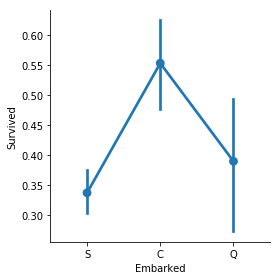

In [119]:
sns.factorplot('Embarked','Survived',data=tit)

In [120]:
#The chances for survival for Embarkement C is highest around 0.55 while it is lowest for S.

In [121]:
#Maximum passenegers boarded from S.

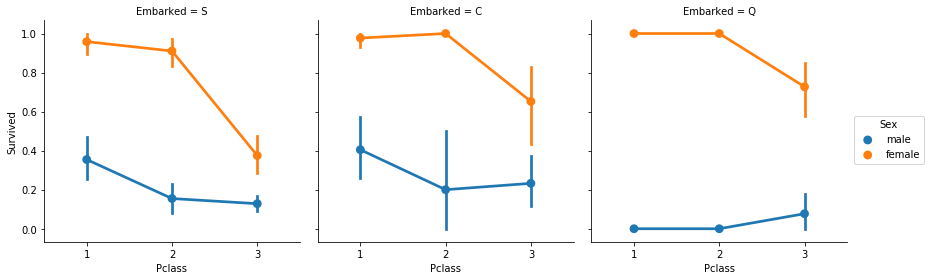

In [122]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=tit)

In [123]:
#The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. 

In [124]:
tit.Embarked.isnull().sum()

2

In [125]:
# so there are two null values in this column, we need to fill up with some value

In [126]:
#as there are more number of people from s port , we will use to fill them as 'S' 

In [127]:
tit['Embarked'].fillna('S',inplace=True)

In [128]:
tit.Embarked.isnull().sum()

0

In [129]:
# we have cleared all the null values in this column

In [130]:
#SIBSIP----------------------------------------------------------------------------------------------
#this column represents whether the a person is alone or with his family members.

In [132]:
pd.crosstab([tit.SibSp],[tit.Survived,tit.Sex],margins=True)

Survived      0           1       All
Sex      female male female male     
SibSp                                
0            37  361    137   73  608
1            26   71     80   32  209
2             3   12     10    3   28
3             7    5      4    0   16
4             4   11      2    1   18
5             1    4      0    0    5
8             3    4      0    0    7
All          81  468    233  109  891

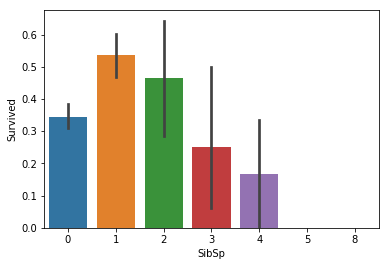

In [133]:
sns.barplot('SibSp','Survived',data=tit)

In [134]:
#The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate.

In [135]:
#Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity for survival

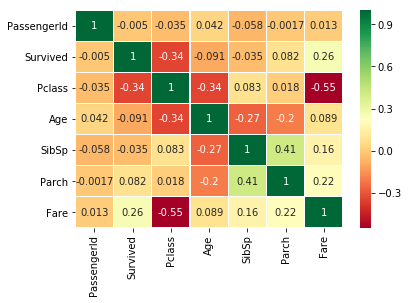

In [137]:
#CORRELATION BETWEEN FEATURES-----------------------------------------
sns.heatmap(tit.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

In [138]:
#Now we are going to gather the important features and excluding the others droping 

In [139]:
# we are gonna make the Age ass catagorial and not numerical as below.

In [142]:
tit['Age_band']=0
tit.loc[tit['Age']<=16,'Age_band']=0
tit.loc[(tit['Age']>16)&(tit['Age']<=32),'Age_band']=1
tit.loc[(tit['Age']>32)&(tit['Age']<=48),'Age_band']=2
tit.loc[(tit['Age']>48)&(tit['Age']<=64),'Age_band']=3
tit.loc[tit['Age']>64,'Age_band']=4
tit.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [144]:
tit['Age_band'].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

In [145]:
#instead of using sibsip and parch we can use family_size and alone columns

In [146]:
tit['Family_Size']=0
tit['Family_Size']=tit['Parch']+tit['SibSp']
tit['Alone']=0
tit.loc[tit.Family_Size==0,'Alone']=1

In [147]:
#Family_Size=0 means that the passeneger is alone.

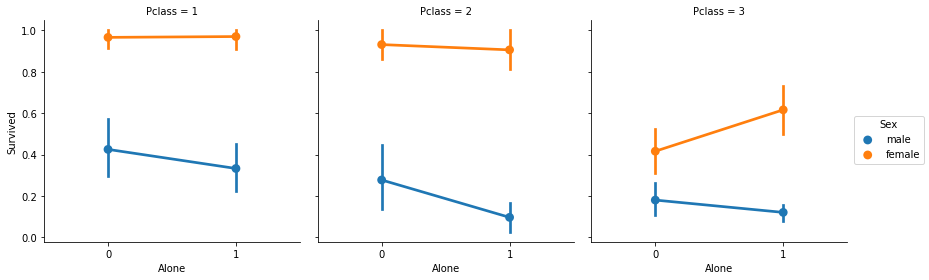

In [148]:
sns.factorplot('Alone','Survived',data=tit,hue='Sex',col='Pclass')

In [149]:
#It is visible that being alone is harmful irrespective of Sex or Pclass.

In [150]:
#so now replace all the string values into  numerical

In [152]:
tit['Sex'].replace(['male','female'],[0,1],inplace=True)
tit['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
tit['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [153]:
#Droping unwanted features

In [155]:
tit.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)

In [156]:
tit.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone
0,0,3,0,1,0,0,0,1,1,0
1,1,1,1,1,0,1,1,2,1,0
2,1,3,1,0,0,0,2,1,0,1
3,1,1,1,1,0,0,1,2,1,0
4,0,3,0,0,0,0,0,2,0,1


In [157]:
#now we have a clear dataset with all importent features in it

In [158]:
######################## Predictive Modeling

In [159]:
#----------Since the problem is to predict whether the person survived or not , it should be using Classification algorithm

In [161]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine and lets try both linear and radial
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [162]:
#training and testing data split

In [164]:
train,test=train_test_split(tit,test_size=0.3,random_state=0,stratify=tit['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=tit[tit.columns[1:]]
Y=tit['Survived']

In [165]:
#first lets try Linear Support Vector Machine

In [166]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)

In [167]:
model.fit(train_X,train_Y)

C:\Users\SAI KRISHNA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [175]:
prediction1=model.predict(test_X)

In [176]:
prediction2

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [177]:
#this contains prediction results

In [178]:
print('Accuracy for linear SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for linear SVM is  0.8171641791044776


In [ ]:
###################      Accuracy for linear SVM is  0.8171641791044776    #####################

In [179]:
#now we will do it for radial svm to check if there is an improvement

In [181]:
model=svm.SVC(gamma=0.1,C=0.1,kernel='rbf')

In [182]:
model.fit(train_X,train_Y)

C:\Users\SAI KRISHNA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [183]:
prediction2=model.predict(test_X)

In [184]:
prediction2

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [188]:
print("Accuracy of radial svm is" ,metrics.accuracy_score(prediction2,test_Y))

Accuracy of radial svm is 0.832089552238806


In [189]:
###############   Accuracy of radial svm is 0.832089552238806       #############
 #so we can find that Radial kernel of SVM predicts slightly better than linear kernal

In [190]:
#Next model is Logistic Regression

In [191]:
model= LogisticRegression()

In [193]:
model.fit(train_X,train_Y)

C:\Users\SAI KRISHNA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [195]:
pred=model.predict(test_X)

In [199]:
print("Accuracy for logistic regression model is",metrics.accuracy_score(pred,test_Y))

Accuracy for logistic regression model is 0.8283582089552238


In [201]:
######################      Accuracy for logistic regression model is 0.8283582089552238  ###########
#still not better than raial kernel.

In [202]:
#Next is    K-Nearest Neighbours<-----

In [203]:
model=KNeighborsClassifier() 

In [206]:
model.fit(train_X,train_Y)
pred=model.predict(test_X)

C:\Users\SAI KRISHNA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [207]:
print('The accuracy of the KNN is',metrics.accuracy_score(pred,test_Y))

The accuracy of the KNN is 0.8134328358208955


In [208]:
#############   The accuracy of the KNN is 0.8134328358208955  #####################
# Here KNN is much lesser than SVM but we should check for k(attribute) for different values

In [212]:
a_index=list(range(1,11))
a=pd.Series()

In [213]:
x=[0,1,2,3,4,5,6,7,8,9,10]

In [214]:
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))

C:\Users\SAI KRISHNA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


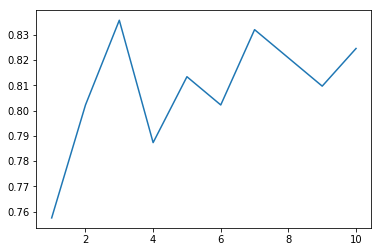

In [220]:
plt.plot(a_index, a)
#there is a peak range in k=3

In [221]:
print("accuracy of knn at k=3 is",a.values.max())

accuracy of knn at k=3 is 0.835820895522388


In [222]:
############ accuracy of knn at k=3 is 0.835820895522388 ################
### this is the best classification algorithm from above which gives us the maximum accuracy.

In [ ]:
###      I HOPE THIS GAVE US SOME INSIGHT ON EDA AND PREDICTIVE MODELING OF TITANIC DATASET        ###